In [23]:
# Load the needed paths
from pathlib import Path
import re
from cellori import Cellori, utils
import numpy as np
import pandas as pd
import cv2
from IPython.display import Image, display
from matplotlib import pyplot as plt
from scipy import ndimage
import glob
import csv
import random
%matplotlib inline  

In [19]:
### For individual image, load the matching images, make nuclei masks, and measure expression ---------------------

# Get all of the paths for nuclei (red) channels
image_dir = Path('/Users/dylanschaff/Library/CloudStorage/GoogleDrive-dyschaff@sydshafferlab.com/My Drive/Schaff_Shared/Cloud/Experiment_IDs/DLS071/images_for_analysis') # Path to all images
nuclei_paths = sorted(list(image_dir.glob('*/*DAPI*.tif')))

# Make the dataframe for the outputs
output_df = pd.DataFrame(columns = ['Mean_488','Mean_647','Cell_num', 'Coords_X', 'Coords_Y','Nuc_file','file_488','file_647'])
error_images = []

# Run analysis in loop
for i in nuclei_paths:

    # Load the correct paths
    nuclei_path = str(i)

    print(nuclei_path)

    path_488 = nuclei_path.replace('/DAPI', '/488')
    path_647 = nuclei_path.replace('/DAPI', '/647') 

    # Run Cellori to find masks for nuclei
    masks, coords, _ = Cellori(nuclei_path).segment(segmentation_mode='combined', threshold_locality=.7, sigma=5, nuclei_diameter=10)

    # Load in the 488 and 647 images
    image_488 = cv2.imread(path_488, cv2.IMREAD_UNCHANGED)
    image_647 = cv2.imread(path_647, cv2.IMREAD_UNCHANGED)

    # Expand the masks by a number of pixels and measure ngfr expression
    dil_struct = np.ones((15,15), dtype = np.uint8)
    expanded_masks = np.zeros_like(masks)
    mean_intensities_488 = []
    mean_intensities_647 = []

    print(len(np.unique(masks)))
    for mask_num in np.unique(masks)[np.unique(masks) > 0]:
        print(mask_num)
        if mask_num == 0:
            continue
        mask = masks == mask_num
        expanded_mask = ndimage.binary_dilation(mask, structure = dil_struct)
        expanded_masks[expanded_mask] = mask_num

        masked_pixels_488 = image_488[mask]
        mean_intensity_488 = np.mean(masked_pixels_488)
        mean_intensities_488.append(mean_intensity_488)

        masked_pixels_647 = image_647[mask]
        mean_intensity_647 = np.mean(masked_pixels_647)
        mean_intensities_647.append(mean_intensity_647)

    

    temp_df = pd.DataFrame(data = {'Mean_488': mean_intensities_488,
                                    'Mean_647': mean_intensities_647,
                                'Cell_num': np.unique(masks)[np.unique(masks) > 0],
                                'Coords_X': coords[:,0],
                                'Coords_Y': coords[:,1],
                                'Nuc_file': [nuclei_path.split('/')[-1]]*len(mean_intensities_488),
                                'file_488': [(path_488.split('/')[-2]+'/'+path_488.split('/')[-1])]*len(mean_intensities_488),
                                'file_647': [(path_647.split('/')[-2]+'/'+path_647.split('/')[-1])]*len(mean_intensities_647)})

    output_df = pd.concat([output_df, temp_df])
        

# Write to CSVs    
outpath = Path(str(image_dir)+'/cellori_output.csv')
output_df.to_csv(outpath)

outpath_errors = Path(str(image_dir)+'/cellori_error_images.csv')
pd.DataFrame(error_images).to_csv(outpath_errors, header = False)

/Users/dylanschaff/Library/CloudStorage/GoogleDrive-dyschaff@sydshafferlab.com/My Drive/Schaff_Shared/Cloud/Experiment_IDs/DLS071/images_for_analysis/20231027_111617_475__Plate2023_10_27_DLS071_Plate2_10x_Well2_ChannelDAPI,GFP,Cy3,A647_Seq0000/DAPI_q1.tif
3858
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212

In [22]:
### For individual image, load the matching images, make nuclei masks, and measure expression NO DILATION ---------------------

# Get all of the paths for nuclei (red) channels
image_dir = Path('/Users/dylanschaff/Library/CloudStorage/GoogleDrive-dyschaff@sydshafferlab.com/My Drive/Schaff_Shared/Cloud/Experiment_IDs/DLS071/images_for_analysis') # Path to all images
nuclei_paths = sorted(list(image_dir.glob('*/*DAPI*.tif')))

# Make the dataframe for the outputs
output_df = pd.DataFrame(columns = ['Mean_488','Mean_647','Cell_num', 'Coords_X', 'Coords_Y','Nuc_file','file_488','file_647'])
error_images = []

# Run analysis in loop
for i in nuclei_paths[1:3]:

    # Load the correct paths
    nuclei_path = str(i)

    print(nuclei_path)

    path_488 = nuclei_path.replace('/DAPI', '/488')
    path_647 = nuclei_path.replace('/DAPI', '/647') 

    # Run Cellori to find masks for nuclei
    masks, coords, _ = Cellori(nuclei_path).segment(segmentation_mode='combined', threshold_locality=.7, sigma=5, nuclei_diameter=10)

    # Load in the 488 and 647 images
    image_488 = cv2.imread(path_488, cv2.IMREAD_UNCHANGED)
    image_647 = cv2.imread(path_647, cv2.IMREAD_UNCHANGED)

    # Expand the masks by a number of pixels and measure ngfr expression
    dil_struct = np.ones((15,15), dtype = np.uint8)
    expanded_masks = np.zeros_like(masks)
    mean_intensities_488 = []
    mean_intensities_647 = []

    print(len(np.unique(masks)))
    for mask_num in np.unique(masks)[np.unique(masks) > 0]:
        print(mask_num)
        if mask_num == 0:
            continue
        mask = masks == mask_num

        masked_pixels_488 = image_488[mask]
        mean_intensity_488 = np.mean(masked_pixels_488)
        mean_intensities_488.append(mean_intensity_488)

        masked_pixels_647 = image_647[mask]
        mean_intensity_647 = np.mean(masked_pixels_647)
        mean_intensities_647.append(mean_intensity_647)

    

    temp_df = pd.DataFrame(data = {'Mean_488': mean_intensities_488,
                                    'Mean_647': mean_intensities_647,
                                'Cell_num': np.unique(masks)[np.unique(masks) > 0],
                                'Coords_X': coords[:,0],
                                'Coords_Y': coords[:,1],
                                'Nuc_file': [nuclei_path.split('/')[-1]]*len(mean_intensities_488),
                                'file_488': [(path_488.split('/')[-2]+'/'+path_488.split('/')[-1])]*len(mean_intensities_488),
                                'file_647': [(path_647.split('/')[-2]+'/'+path_647.split('/')[-1])]*len(mean_intensities_647)})

    output_df = pd.concat([output_df, temp_df])
        

# Write to CSVs    
outpath = Path(str(image_dir)+'/cellori_output_nodil.csv')
output_df.to_csv(outpath)

outpath_errors = Path(str(image_dir)+'/cellori_error_images_nodil.csv')
pd.DataFrame(error_images).to_csv(outpath_errors, header = False)

/Users/dylanschaff/Library/CloudStorage/GoogleDrive-dyschaff@sydshafferlab.com/My Drive/Schaff_Shared/Cloud/Experiment_IDs/DLS071/images_for_analysis/20231027_111617_475__Plate2023_10_27_DLS071_Plate2_10x_Well2_ChannelDAPI,GFP,Cy3,A647_Seq0000/DAPI_q2.tif
1776
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212

In [72]:
### For individual image, load the matching images, make nuclei masks, and measure expression ---------------------

# Get all of the paths for nuclei (red) channels
image_dir = Path('/Users/dylanschaff/Library/CloudStorage/GoogleDrive-dyschaff@sydshafferlab.com/My Drive/Schaff_Shared/Cloud/Experiment_IDs/DLS071/images_for_analysis') # Path to all images
nuclei_paths = sorted(list(image_dir.glob('*/*DAPI*.tif')))


# Make the dataframe for the outputs
output_df = pd.DataFrame(columns = ['Mean_488','Mean_647','Cell_num', 'Coords_X', 'Coords_Y','Nuc_file','file_488','file_647'])
error_images = []

# Run analysis in loop
for i in nuclei_paths:

    # Load the correct paths
    nuclei_path = str(i)

    print(nuclei_path)

    path_488 = nuclei_path.replace('/DAPI', '/488')
    path_647 = nuclei_path.replace('/DAPI', '/647') 

    # Run Cellori to find masks for nuclei
    masks, coords, _ = Cellori(nuclei_path).segment(segmentation_mode='combined', threshold_locality=.7, sigma=5, nuclei_diameter=10)

    #seed and random indexing for subsetting later
    random.seed(1)
    index = np.random.choice(masks.max(), 100, replace=False)

    # Load in the 488 and 647 images
    image_488 = cv2.imread(path_488, cv2.IMREAD_UNCHANGED)
    image_647 = cv2.imread(path_647, cv2.IMREAD_UNCHANGED)

    # Expand the masks by a number of pixels and measure ngfr expression
    dil_struct = np.ones((15,15), dtype = np.uint8)
    expanded_masks = np.zeros_like(masks)
    mean_intensities_488 = []
    mean_intensities_647 = []
    Coords_X = []
    Coords_Y = []

    for mask_num in np.unique(masks)[index][np.unique(masks)[index] > 0]:
        print(mask_num)
        if mask_num == 0:
            continue
        mask = masks == mask_num
        expanded_mask = ndimage.binary_dilation(mask, structure = dil_struct)
        expanded_masks[expanded_mask] = mask_num

        masked_pixels_488 = image_488[expanded_mask]
        mean_intensity_488 = np.mean(masked_pixels_488)
        mean_intensities_488.append(mean_intensity_488)

        masked_pixels_647 = image_647[expanded_mask]
        mean_intensity_647 = np.mean(masked_pixels_647)
        mean_intensities_647.append(mean_intensity_647)

        Coords_X.append(coords[mask_num,1])
        Coords_Y.append(coords[mask_num,0])

    

    temp_df = pd.DataFrame(data = {'Mean_488': mean_intensities_488,
                                    'Mean_647': mean_intensities_647,
                                'Coords_X': Coords_X,
                                'Coords_Y': Coords_Y,
                                'Nuc_file': [nuclei_path.split('/')[-1]]*len(mean_intensities_488),
                                'file_488': [(path_488.split('/')[-2]+'/'+path_488.split('/')[-1])]*len(mean_intensities_488),
                                'file_647': [(path_647.split('/')[-2]+'/'+path_647.split('/')[-1])]*len(mean_intensities_647)})

    output_df = pd.concat([output_df, temp_df])
        

# Write to CSVs    
outpath = Path(str(image_dir)+'/100subsampleperimage_cellori_output.csv')
output_df.to_csv(outpath)

outpath_errors = Path(str(image_dir)+'/100subsampleperimage_cellori_error_images.csv')
pd.DataFrame(error_images).to_csv(outpath_errors, header = False)

/Users/dylanschaff/Library/CloudStorage/GoogleDrive-dyschaff@sydshafferlab.com/My Drive/Schaff_Shared/Cloud/Experiment_IDs/DLS071/images_for_analysis/20231027_111617_475__Plate2023_10_27_DLS071_Plate2_10x_Well2_ChannelDAPI,GFP,Cy3,A647_Seq0000/DAPI_q4.tif
2858
551
952
2038
102
440


In [70]:
### For individual image, load the matching images, make nuclei masks, and measure expression ---------------------

# Get all of the paths for nuclei (red) channels
image_dir = Path('/Users/dylanschaff/Library/CloudStorage/GoogleDrive-dyschaff@sydshafferlab.com/My Drive/Schaff_Shared/Cloud/Experiment_IDs/DLS071/images_for_analysis') # Path to all images
#nuclei_paths = sorted(list(image_dir.glob('*/*DAPI*.tif')))
nuclei_paths = sorted(list(image_dir.glob('*_Plate2_10x_Well2_ChannelDAPI,GFP,Cy3,A647_Seq0000/DAPI_q4.tif')))

# Make the dataframe for the outputs
output_df = pd.DataFrame(columns = ['Mean_488','Mean_647','Cell_num', 'Coords_X', 'Coords_Y','Nuc_file','file_488','file_647'])
error_images = []

# Run analysis in loop
for i in nuclei_paths:

    # Load the correct paths
    nuclei_path = str(i)

    print(nuclei_path)

    path_488 = nuclei_path.replace('/DAPI', '/488')
    path_647 = nuclei_path.replace('/DAPI', '/647') 

    # Run Cellori to find masks for nuclei
    masks, coords, _ = Cellori(nuclei_path).segment(segmentation_mode='combined', threshold_locality=.7, sigma=5, nuclei_diameter=10)

    #seed and random indexing for subsetting later
    random.seed(1)
    index = np.random.choice(masks.max(), 100, replace=False)

    # Load in the 488 and 647 images
    image_488 = cv2.imread(path_488, cv2.IMREAD_UNCHANGED)
    image_647 = cv2.imread(path_647, cv2.IMREAD_UNCHANGED)

    # Expand the masks by a number of pixels and measure ngfr expression
    dil_struct = np.ones((15,15), dtype = np.uint8)
    expanded_masks = np.zeros_like(masks)
    mean_intensities_488 = []
    mean_intensities_647 = []
    Coords_X = []
    Coords_Y = []

    for mask_num in np.unique(masks)[index][np.unique(masks)[index] > 0]:
        print(mask_num)
        if mask_num == 0:
            continue
        mask = masks == mask_num
        expanded_mask = ndimage.binary_dilation(mask, structure = dil_struct)
        expanded_masks[expanded_mask] = mask_num

        masked_pixels_488 = image_488[expanded_mask]
        mean_intensity_488 = np.mean(masked_pixels_488)
        mean_intensities_488.append(mean_intensity_488)

        masked_pixels_647 = image_647[expanded_mask]
        mean_intensity_647 = np.mean(masked_pixels_647)
        mean_intensities_647.append(mean_intensity_647)

        Coords_X.append(coords[mask_num,1])
        Coords_Y.append(coords[mask_num,0])

    

    temp_df = pd.DataFrame(data = {'Mean_488': mean_intensities_488,
                                    'Mean_647': mean_intensities_647,
                                'Coords_X': Coords_X,
                                'Coords_Y': Coords_Y,
                                'Nuc_file': [nuclei_path.split('/')[-1]]*len(mean_intensities_488),
                                'file_488': [(path_488.split('/')[-2]+'/'+path_488.split('/')[-1])]*len(mean_intensities_488),
                                'file_647': [(path_647.split('/')[-2]+'/'+path_647.split('/')[-1])]*len(mean_intensities_647)})

    output_df = pd.concat([output_df, temp_df])
        

# Write to CSVs    
outpath = Path(str(image_dir)+'/test_cellori_output.csv')
output_df.to_csv(outpath)

outpath_errors = Path(str(image_dir)+'/test_cellori_error_images.csv')
pd.DataFrame(error_images).to_csv(outpath_errors, header = False)

Code for testing how the cellori works on images for segmenting nuclei

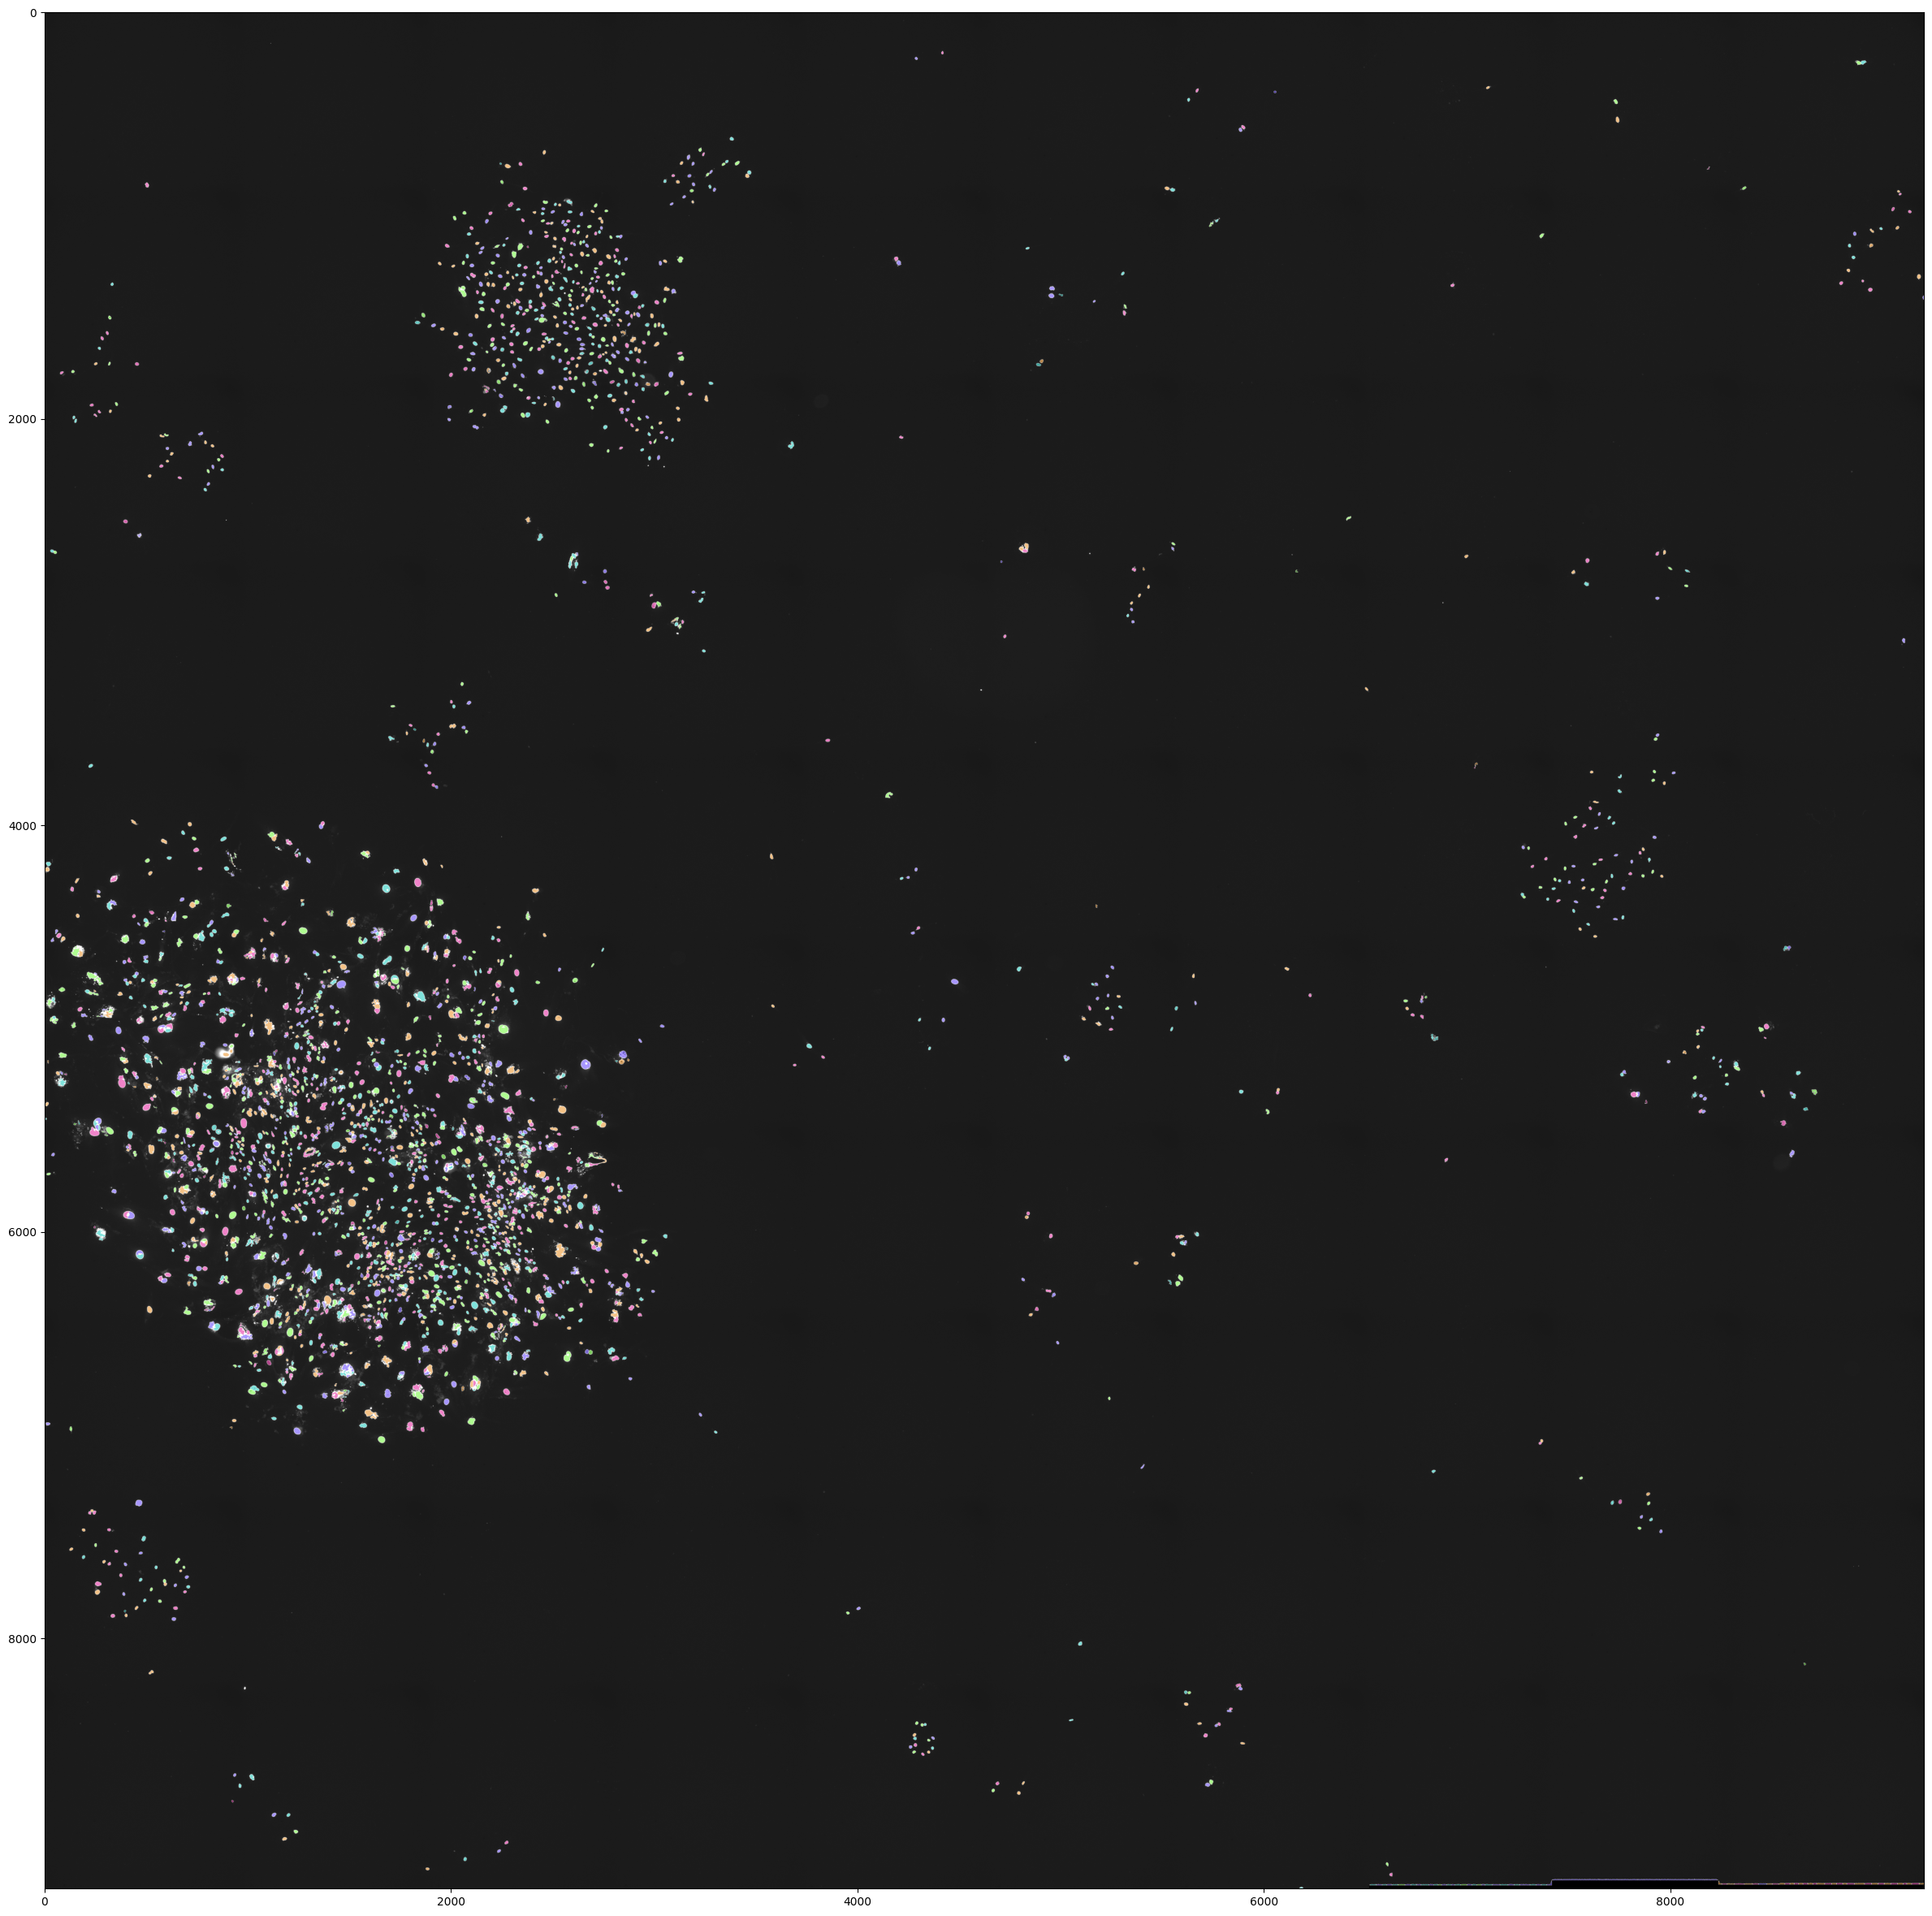

In [21]:
# Segment using custom parameters.
masks, coords, image = Cellori('/Users/dylanschaff/Library/CloudStorage/GoogleDrive-dyschaff@sydshafferlab.com/My Drive/Schaff_Shared/Cloud/Experiment_IDs/DLS071/20231027_111617_475__Plate2023_10_27_DLS071_Plate2_10x_Well2_ChannelDAPI,GFP,Cy3,A647_Seq0000/DAPI_q4.tif').segment(segmentation_mode='combined', threshold_locality=.7, sigma=5, nuclei_diameter=10)

# Create segmentation overlay.
overlay = utils.overlay_segmentation(image, masks)

plt.figure(figsize=(30, 30))
plt.imshow(overlay)


In [94]:
### For individual image, load the matching images, make nuclei masks, and measure expression ---------------------

# Get all of the paths for nuclei (red) channels
image_dir = Path('/Users/dylanschaff/Library/CloudStorage/GoogleDrive-dyschaff@sydshafferlab.com/My Drive/Schaff_Shared/Cloud/Experiment_IDs/DLS071/images_for_analysis') # Path to all images
nuclei_paths = sorted(list(image_dir.glob('*/*DAPI*.tif')))

# Make the dataframe for the outputs
output_df = pd.DataFrame(columns = ['Mean_488','Mean_647','Cell_num', 'Coords_X', 'Coords_Y','Nuc_file','file_488','file_647'])
error_images = []

# Run analysis in loop
for i in nuclei_paths[0:2]:

    # Load the correct paths
    nuclei_path = str(i)

    print(nuclei_path)

    path_488 = nuclei_path.replace('/DAPI', '/488')
    path_647 = nuclei_path.replace('/DAPI', '/647')

    # Run Cellori to find masks for nuclei
    masks, coords, _ = Cellori(nuclei_path).segment(segmentation_mode='combined', threshold_locality=.7, sigma=5, nuclei_diameter=10)

    # Load in the 488 and 647 images
    image_488 = cv2.imread(path_488, cv2.IMREAD_UNCHANGED)
    image_647 = cv2.imread(path_647, cv2.IMREAD_UNCHANGED)

    # Expand the masks by a number of pixels and measure ngfr expression
    dil_struct = np.ones((15,15), dtype = np.uint8)
    expanded_masks = np.zeros_like(masks)
    mean_intensities_488 = []
    mean_intensities_647 = []

    print(len(np.unique(masks)))
    for mask_num in np.unique(masks)[np.unique(masks) > 0][:3]:
        print(mask_num)
        if mask_num == 0:
            continue
        mask = masks == mask_num
        expanded_mask = ndimage.binary_dilation(mask, structure = dil_struct)
        expanded_masks[expanded_mask] = mask_num

        masked_pixels_488 = image_488[mask]
        mean_intensity_488 = np.mean(masked_pixels_488)
        mean_intensities_488.append(mean_intensity_488)

        masked_pixels_647 = image_647[mask]
        mean_intensity_647 = np.mean(masked_pixels_647)
        mean_intensities_647.append(mean_intensity_647)

    

    temp_df = pd.DataFrame(data = {'Mean_488': mean_intensities_488,
                                    'Mean_647': mean_intensities_647,
                                'Cell_num': np.unique(masks)[np.unique(masks) > 0][:3],
                                'Coords_X': coords[:,0][:3],
                                'Coords_Y': coords[:,1][:3],
                                'Nuc_file': [nuclei_path.split('/')[-1]]*len(mean_intensities_488),
                                'file_488': [(path_488.split('/')[-2]+'/'+path_488.split('/')[-1])]*len(mean_intensities_488),
                                'file_647': [(path_647.split('/')[-2]+'/'+path_647.split('/')[-1])]*len(mean_intensities_647)})

    output_df = pd.concat([output_df, temp_df])

# Write to CSVs    
outpath = Path(str(image_dir)+'/cellori_output.csv')
output_df.to_csv(outpath)

/Users/dylanschaff/Library/CloudStorage/GoogleDrive-dyschaff@sydshafferlab.com/My Drive/Schaff_Shared/Cloud/Experiment_IDs/DLS071/images_for_analysis/20231027_111617_475__Plate2023_10_27_DLS071_Plate2_10x_Well2_ChannelDAPI,GFP,Cy3,A647_Seq0000/DAPI_q1.tif
3858
1
2
3
/Users/dylanschaff/Library/CloudStorage/GoogleDrive-dyschaff@sydshafferlab.com/My Drive/Schaff_Shared/Cloud/Experiment_IDs/DLS071/images_for_analysis/20231027_111617_475__Plate2023_10_27_DLS071_Plate2_10x_Well2_ChannelDAPI,GFP,Cy3,A647_Seq0000/DAPI_q2.tif
1776
1
2
3


/Users/dylanschaff/Library/CloudStorage/GoogleDrive-dyschaff@sydshafferlab.com/My Drive/Schaff_Shared/Cloud/Experiment_IDs/DLS071/images_for_analysis/20231027_154228_541__Plate2023_10_27_DLS071_Plate1_10x_scan2_Well1_ChannelDAPI,GFP,Cy3,A647_Seq0000/DAPI_q1.tif
1407
1
2
3


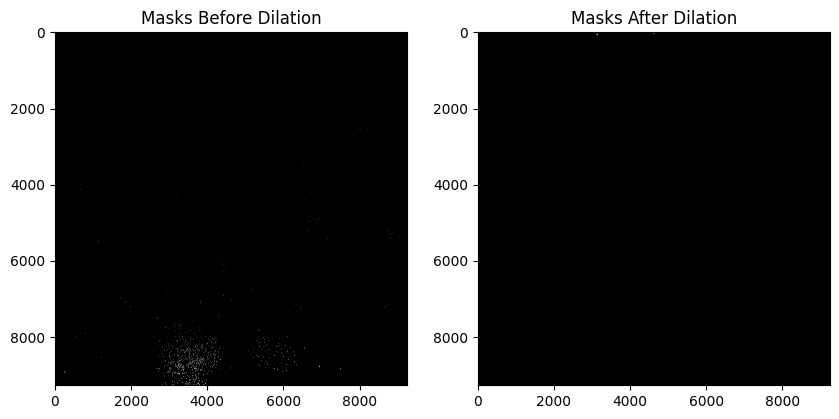

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

# Load the correct paths
nuclei_path = str('/Users/dylanschaff/Library/CloudStorage/GoogleDrive-dyschaff@sydshafferlab.com/My Drive/Schaff_Shared/Cloud/Experiment_IDs/DLS071/images_for_analysis/20231027_154228_541__Plate2023_10_27_DLS071_Plate1_10x_scan2_Well1_ChannelDAPI,GFP,Cy3,A647_Seq0000/DAPI_q1.tif')

print(nuclei_path)

path_488 = nuclei_path.replace('/DAPI', '/488')
path_647 = nuclei_path.replace('/DAPI', '/647')

# Run Cellori to find masks for nuclei
masks, coords, _ = Cellori(nuclei_path).segment(segmentation_mode='combined', threshold_locality=.7, sigma=5, nuclei_diameter=10)

# Load in the 488 and 647 images
image_488 = cv2.imread(path_488, cv2.IMREAD_UNCHANGED)
image_647 = cv2.imread(path_647, cv2.IMREAD_UNCHANGED)

# Expand the masks by a number of pixels and measure ngfr expression
dil_struct = np.ones((15, 15), dtype=np.uint8)
expanded_masks = np.zeros_like(masks)
mean_intensities_488 = []
mean_intensities_647 = []

# Visualize masks before dilation
plt.figure(figsize=(30,30))
plt.subplot(1, 2, 1)
plt.title("Masks Before Dilation")
plt.imshow(masks, cmap='gray')

print(len(np.unique(masks)))
for mask_num in np.unique(masks)[np.unique(masks) > 0][:3]:
    print(mask_num)
    if mask_num == 0:
        continue
    mask = masks == mask_num
    expanded_mask = ndimage.binary_dilation(mask, structure=dil_struct)
    expanded_masks[expanded_mask] = mask_num

# Visualize masks after dilation
plt.subplot(1, 2, 2)
plt.title("Masks After Dilation")
plt.imshow(expanded_masks, cmap='gray')
plt.show()


1407
1388
1389
1390
1391
1392
1393
1394
1395
1396
1397
1398
1399
1400
1401
1402
1403
1404
1405
1406


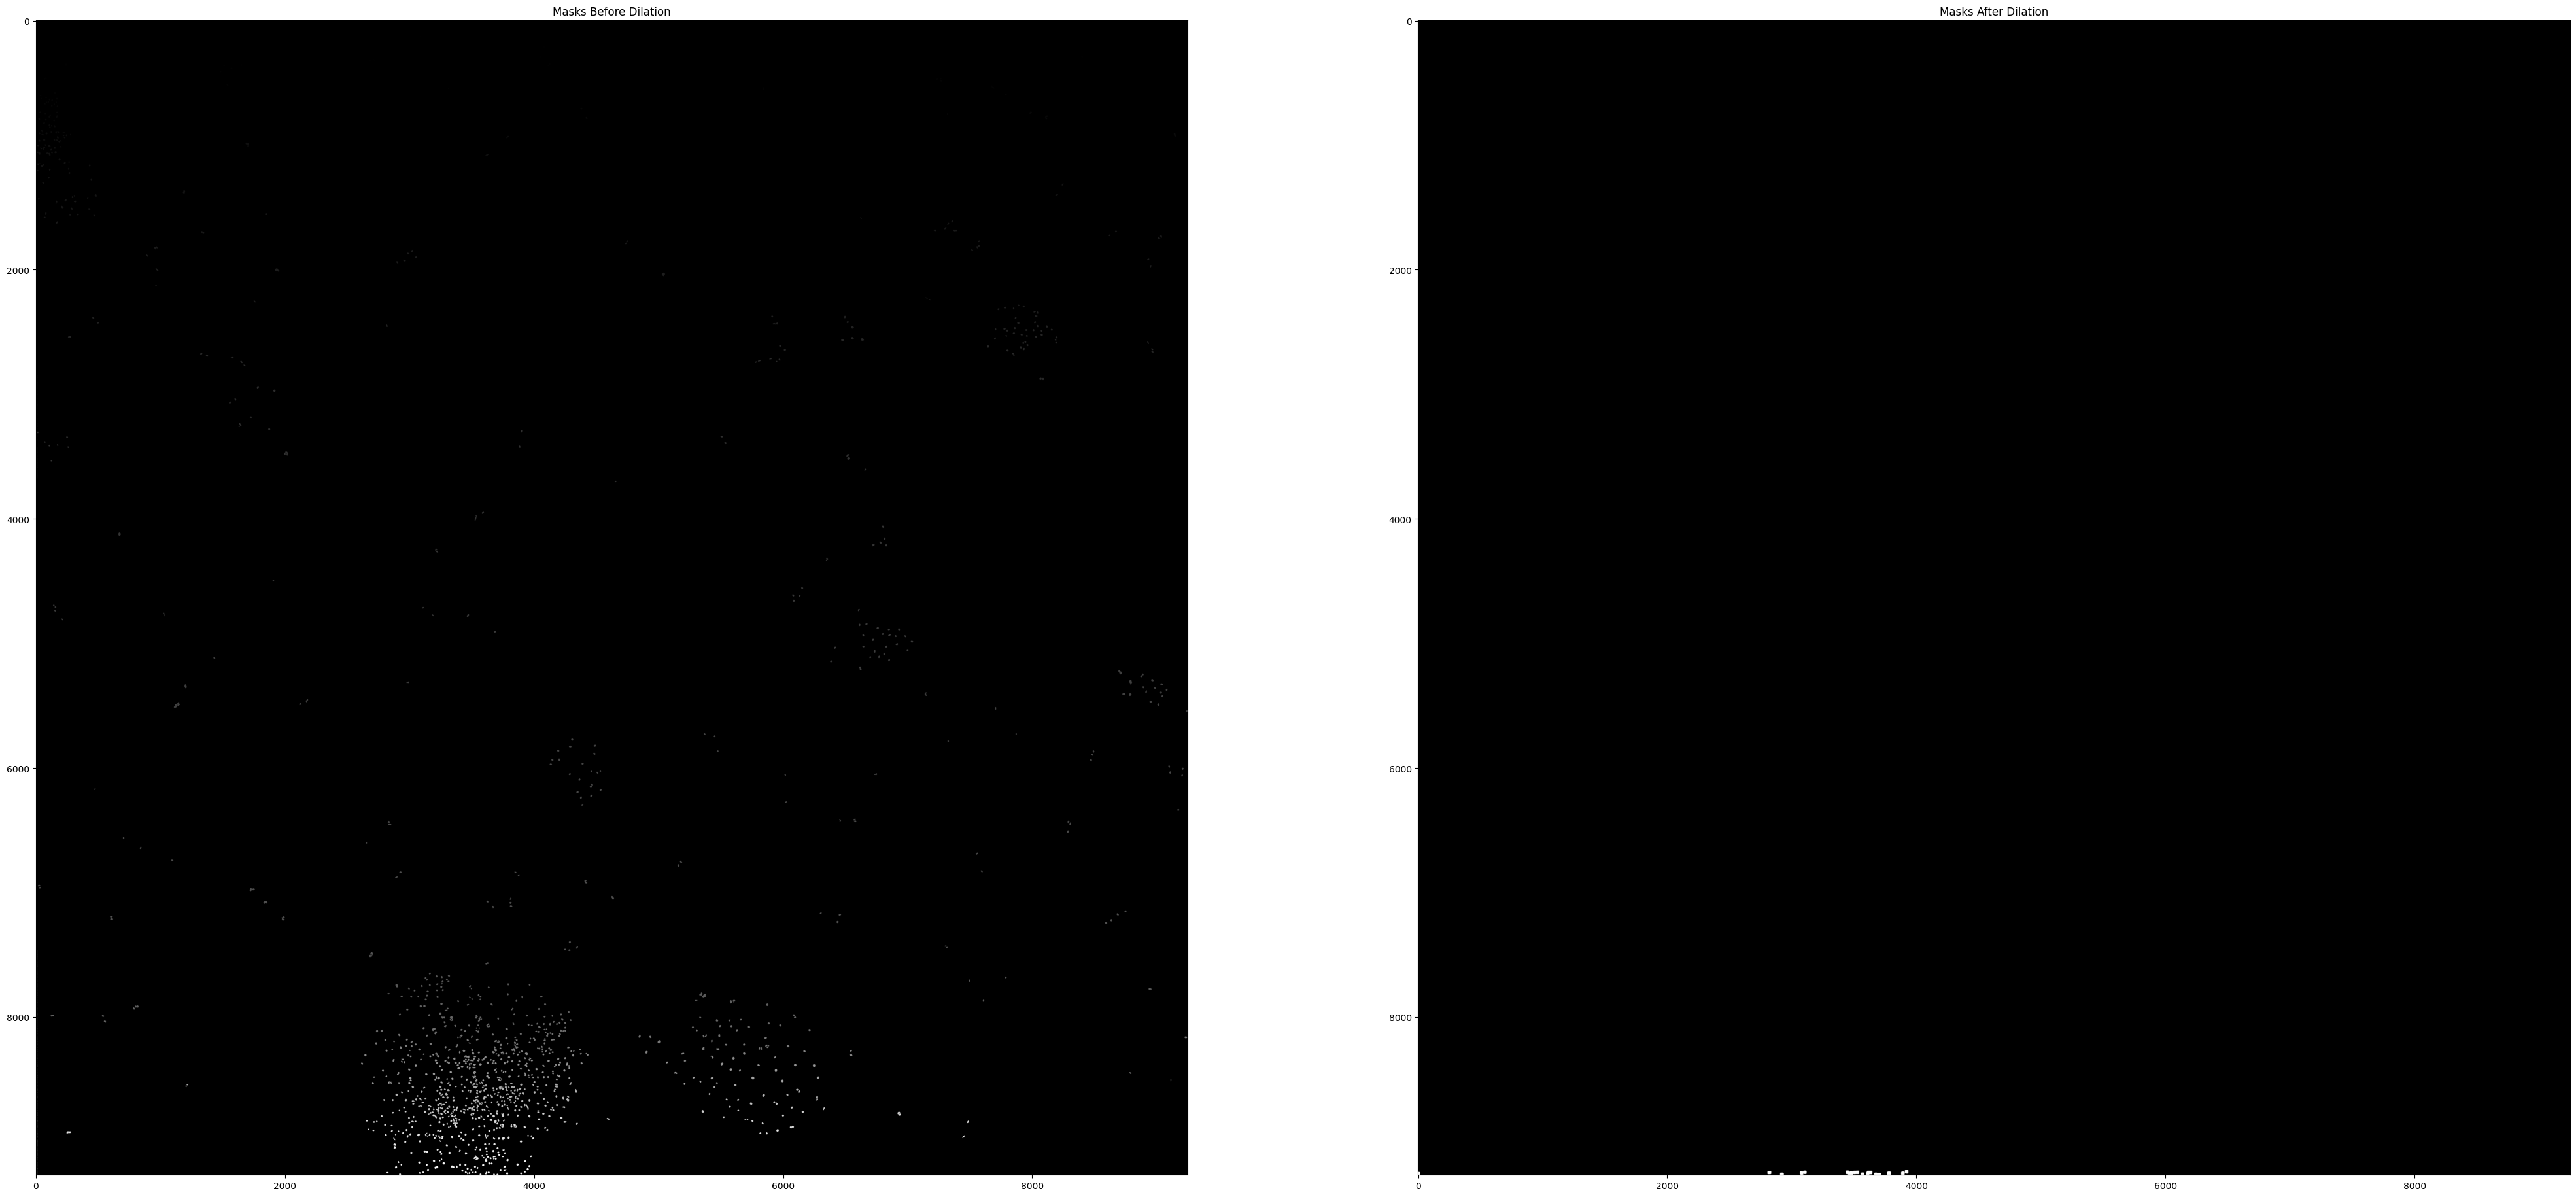

In [18]:
# Visualize masks before dilation
plt.figure(figsize=(50,50))
plt.subplot(1, 2, 1)
plt.title("Masks Before Dilation")
plt.imshow(masks, cmap='gray')

print(len(np.unique(masks)))
for mask_num in np.unique(masks)[np.unique(masks) > 0][len(np.unique(masks))-20:len(np.unique(masks))]:
    print(mask_num)
    if mask_num == 0:
        continue
    mask = masks == mask_num
    expanded_mask = ndimage.binary_dilation(mask, structure=dil_struct)
    expanded_masks[expanded_mask] = mask_num

# Visualize masks after dilation
plt.subplot(1, 2, 2)
plt.title("Masks After Dilation")
plt.imshow(expanded_masks, cmap='gray')
plt.show()

In [9]:
image_before_dilation[mask]

array([ 6201,  8401,  9178,  8959, 10485,  9897, 10451,  9952,  9124,
        7189,  5931,  6485,  6720,  8191,  8203,  7421,  7558,  6058,
        5046,  4471,  4268,  2171,  3574,  7533,  9350,  9365,  9957,
        8693,  9643,  8747,  7593,  5340,  5128,  6515,  8024,  7749,
        7324,  5369,  3639,  4870,  4348,  4538,  2318,  4935,  9434,
       10180,  9511,  9725,  9872,  7998,  7271,  3966,  5021,  5995,
        6640,  5391,  2929,  4360,  4669,  3939,  3022,  8376,  9917,
       10538, 10548,  9514,  7217,  5260,  4581,  6066,  5808,  4584,
        5348,  6357,  7155,  8063,  6776,  4592,  4422,  5776,  7081,
        6633,  6104,  4353,  5233,  6554,  7030,  8109,  7344,  4346,
        4508,  6617,  6956,  6162,  5937,  6487,  6393,  4207,  6089,
        6566,  6137,  6743,  5247,  4456,  4568,  5152,  5815,  5646,
        6040,  4827,  4801,  6727,  3638,  2768,  4068,  3255,  3219,
        3811,  2164], dtype=uint16)